In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk import FreqDist
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [2]:
stops = set(stopwords.words('english'))
stops.remove('no')
stops.remove('not')

In [3]:
lit_df = pd.read_csv('lit.csv')
ero_df = pd.read_csv('ero.csv')

In [4]:
lit_df.head()

,post,post_num
0,[],0
1,[],0
2,"['i', 'm', 'currently', 'working', 'on', 'a', ...",0
3,"['hi', 'all', 'i', 'm', 'writing', 'a', 'short...",0
4,"['hey', 'i', 'have', 'an', 'oc', 'with', 'the'...",0


In [5]:
ero_df.head()

,post,post_num
0,"['it', 'had', 'been', 'a', 'few', 'day', 'sinc...",1
1,"['i', 'lay', 'there', 'looking', 'at', 'bernie...",1
2,[],1
3,[],1
4,"['we', 'have', 'been', 'together', 'through', ...",1


In [6]:
lit_df.shape

(400, 2)

In [7]:
ero_df.shape

(400, 2)

In [8]:
lit_df['post'].isnull().sum()

0

In [9]:
ero_df['post'].isnull().sum()

0

In [10]:
lit_df.head()

,post,post_num
0,[],0
1,[],0
2,"['i', 'm', 'currently', 'working', 'on', 'a', ...",0
3,"['hi', 'all', 'i', 'm', 'writing', 'a', 'short...",0
4,"['hey', 'i', 'have', 'an', 'oc', 'with', 'the'...",0


In [11]:
lit_df = lit_df[(lit_df['post'] != "['deleted']") & (lit_df['post'] != '[]')]

To be safe remove all the empty posts or ones that have a deleted sting as the post, for the literature dataframe

In [12]:
print(lit_df.head())
print(lit_df.tail())

                                                post  post_num
2  ['i', 'm', 'currently', 'working', 'on', 'a', ...         0
3  ['hi', 'all', 'i', 'm', 'writing', 'a', 'short...         0
4  ['hey', 'i', 'have', 'an', 'oc', 'with', 'the'...         0
6  ['my', 'way', 'of', 'processing', 'working', '...         0
8  ['i', 'm', 'begging', 'you', 'for', 'once', 'i...         0
                                                  post  post_num
393  ['me', 'and', 'my', 'dad', 'doused', 'in', 'th...         0
394  ['i', 've', 'been', 'searching', 'all', 'over'...         0
395  ['so', 'this', 'is', 'from', 'an', 'unnamed', ...         0
397  ['finally', 'settling', 'down', 'and', 'writin...         0
398  ['there', 's', 'extravagant', 'language', 'mot...         0


In [13]:
ero_df = ero_df[(ero_df['post'] != "['deleted']") & (ero_df['post'] != '[]')]

To be safe remove empty posts or ones that have a deleted string as the post, for the erotic dataframe.

In [14]:
print(ero_df.head())
print(ero_df.tail())

                                                post  post_num
0  ['it', 'had', 'been', 'a', 'few', 'day', 'sinc...         1
1  ['i', 'lay', 'there', 'looking', 'at', 'bernie...         1
4  ['we', 'have', 'been', 'together', 'through', ...         1
5  ['the', 'story', 'so', 'far', 'on', 'an', 'alt...         1
6  ['so', 'i', 've', 'read', 'several', 'book', '...         1
                                                  post  post_num
393  ['i', 'wa', 'around', '12', 'when', 'i', 'got'...         1
395  ['oh', 'man', 'what', 'happened', 'to', 'the',...         1
396  ['miss', 'fortune', 's', 'hip', 'sashay', 'a',...         1
397  ['i', 'wa', 'horny', 'of', 'that', 'level', 'o...         1
399  ['11', 'child', 'have', 'been', 'born', 'in', ...         1


In [15]:
ero_df.shape

(238, 2)

In [16]:
lit_df.shape

(272, 2)

In [17]:
story_df = ero_df.merge(lit_df, how = 'outer', sort = True)

Combine the two seperate DataFrames into one.

In [18]:
story_df.shape

(510, 2)

In [19]:
story_df[270:280]

,post,post_num
270,"['just', 'signed', 'up', 'for', 'reddit', 'tod...",0
271,"['just', 'start', 'writing', 'one', 'sentence'...",1
272,"['just', 'thought', 'i', 'd', 'drop', 'this', ...",0
273,"['just', 'wrote', 'this', 'up', 'for', 'fun', ...",1
274,"['katie', 'always', 'had', 'a', 'little', 'bit...",1
275,"['last', 'year', 'i', 'submitted', 'a', 'story...",0
276,"['legend', 'tell', 'of', 'the', 'tragic', 'pli...",0
277,"['let', 'me', 'know', 'what', 'you', 'think', ...",0
278,"['let', 'me', 'know', 'what', 'you', 'think', ...",1
279,"['like', 'quite', 'a', 'few', 'people', 'i', '...",0


In [20]:
story_df.head()

,post,post_num
0,"['11', 'child', 'have', 'been', 'born', 'in', ...",1
1,"['a', 'a', 'final', 'christmas', 'present', 'a...",1
2,"['a', 'a', 'new', 'hobby', 'i', 'wanted', 'to'...",0
3,"['a', 'christmastime', 'sleigh', 'ride', 'eigh...",0
4,"['a', 'continuation', 'to', 'seth', 'destroyer...",1


In [21]:
story_df.tail()

,post,post_num
505,"['you', 'enter', 'the', 'brothel', 'and', 'you...",1
506,"['you', 'grasped', 'me', 'a', 'if', 'you', 'ne...",0
507,"['you', 'know', 'it', 's', 'that', 'thing', 'a...",0
508,"['you', 're', 'eye', 'remind', 'me', 'of', 'th...",0
509,"['zack', 'i', 'remember', 'hearing', 'on', 'th...",0


In [22]:
story_df.head()

,post,post_num
0,"['11', 'child', 'have', 'been', 'born', 'in', ...",1
1,"['a', 'a', 'final', 'christmas', 'present', 'a...",1
2,"['a', 'a', 'new', 'hobby', 'i', 'wanted', 'to'...",0
3,"['a', 'christmastime', 'sleigh', 'ride', 'eigh...",0
4,"['a', 'continuation', 'to', 'seth', 'destroyer...",1


In [23]:
story_df['post'] = story_df['post'].str.replace("', '", ' ')
story_df['post'] = story_df['post'].str.replace("[", '')
story_df['post'] = story_df['post'].str.replace("]", '')

Replace some of the leftover 'html' artifacts with blanks or a space

In [24]:
story_df.head()

,post,post_num
0,'11 child have been born in antarctica this wa...,1
1,'a a final christmas present and a thank you f...,1
2,'a a new hobby i wanted to start writing and s...,0
3,'a christmastime sleigh ride eight people in t...,0
4,'a continuation to seth destroyer of girl http...,1


In [25]:
X = story_df['post']
y = story_df['post_num']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 13,
                                                   stratify = y)

In [27]:
X_train

0      '11 child have been born in antarctica this wa...
275    'last year i submitted a story to the louise m...
171    'i have completed the short story commission c...
501    'word vomit you can feel it coming up again i ...
333    'really thirsti today need someone right now s...
                             ...                        
67     'from kindergarten through high school i atten...
201    'i never could have comprehended how much my l...
45     'day 2 i wake up pressed against her my arm is...
33     'broke is the man without experience broke is ...
40     'by the time i realised she wa flirting with m...
Name: post, Length: 382, dtype: object

In [28]:
cvpipe = Pipeline([
    ('cvec', CountVectorizer(token_pattern = (r'[^\d\W]+'),#Kenny and Charlie helped me find this!!!!!!!
                             stop_words = stops)),
    ('lr', LogisticRegression())
])

tvpipe = Pipeline([
    ('tvec', TfidfVectorizer(token_pattern = (r'[^\d\W]+'),#Kenny and Charlie helped me find this!!!!!!!
                             stop_words = stops)),
    ('lr', LogisticRegression())
])

nbpipe = Pipeline([
    ('cvec', CountVectorizer(token_pattern = (r'[^\d\W]+'),#Kenny and Charlie helped me find this!!!!!!!
                             stop_words = stops)),    
    ('nb', BernoulliNB())
])

In [29]:
cvec = CountVectorizer(token_pattern = (r'[^\d\W]+'), stop_words = stops)

In [30]:
cvec_X_train = cvec.fit_transform(X_train)

In [31]:
tvec = TfidfVectorizer(token_pattern = (r'[^\d\W]+'), stop_words = stops)

In [32]:
tvec_X_train = tvec.fit_transform(X_train)

In [33]:
cvpipe_params = {
    'cvec__max_features': [2000, 3000, 4000, 5000],
    'cvec__min_df': [1, 2, 3, 4, 5],
    'cvec__max_df': [.75,.9,.95, .99],
    'cvec__ngram_range': [(1,1),(1,2)],
    'lr__solver': ['newton-cg', 'liblinear']
}

tvpipe_params = {
    'tvec__max_features': [2000, 3000, 4000, 5000],
    'tvec__min_df': [2, 3, 4, 5, 1],
    'tvec__max_df': [.75,.9,.95, .99],
    'tvec__ngram_range': [(1,1),(1,2)]
}

nbpipe_params = {
    'cvec__max_features': [2000, 3000, 4000, 5000],
    'cvec__min_df': [2, 3, 4, 5, 1],
    'cvec__max_df': [.75,.9,.95, .99],
    'cvec__ngram_range': [(1,1),(1,2)],
    'nb__alpha': [0.01, .25, .5, .75, 1.0]
    
}

In [34]:
cvgs = GridSearchCV(cvpipe, cvpipe_params, cv = 5)
tvgs = GridSearchCV(tvpipe, tvpipe_params, cv = 5)
nbgs = GridSearchCV(nbpipe, nbpipe_params, cv = 5)

In [35]:
cvgs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [36]:
cvgs.best_score_

0.9187628161312371

In [37]:
cvgs_model = cvgs.best_estimator_

In [38]:
cvgs.best_params_

{'cvec__max_df': 0.75,
 'cvec__max_features': 4000,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 2),
 'lr__solver': 'newton-cg'}

In [39]:
cvgs_model.score(X_train,y_train)

0.9973821989528796

In [40]:
cvgs_model.score(X_test, y_test)

0.8984375

In [41]:
tvgs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [42]:
tvgs.best_score_

0.9136363636363637

In [43]:
tvgs.best_params_

{'tvec__max_df': 0.75,
 'tvec__max_features': 4000,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 2)}

In [44]:
tvgs_model = tvgs.best_estimator_

In [45]:
tvgs_model.score(X_train, y_train)

0.9581151832460733

In [46]:
tvgs_model.score(X_test,y_test)

0.875

In [47]:
nbgs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [48]:
nbgs.best_score_

0.811654135338346

In [49]:
nbgs_model = nbgs.best_estimator_

In [50]:
nbgs_model.score(X_train, y_train)

0.819371727748691

In [51]:
nbgs_model.score(X_test, y_test)

0.75

In [52]:
nbgs.best_params_

{'cvec__max_df': 0.75,
 'cvec__max_features': 2000,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 2),
 'nb__alpha': 0.01}

In [53]:
cvec_X_train_df = pd.DataFrame(cvec_X_train.toarray(),
                          columns=cvec.get_feature_names())

In [54]:
tvec_X_train_df = pd.DataFrame(tvec_X_train.toarray(),
                          columns=cvec.get_feature_names())

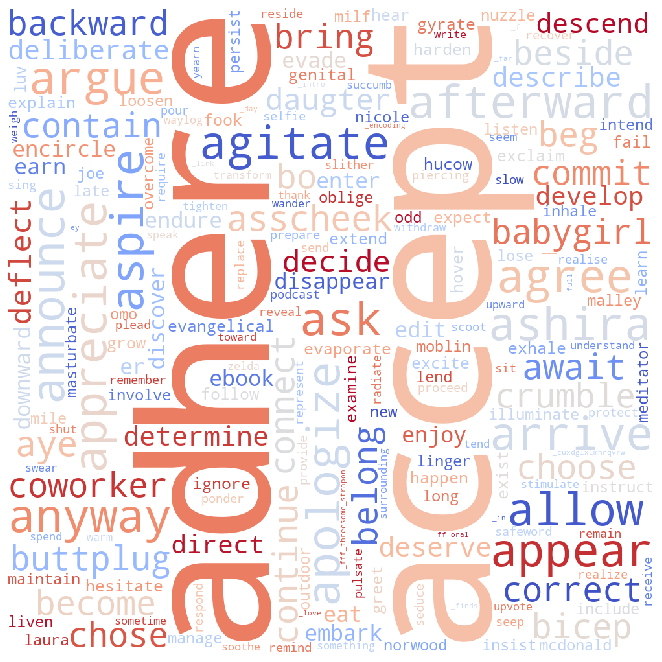

In [55]:
comment_words = ' '

for val in cvec_X_train_df: 
    val = str(val) 
    tokens = val.split()
    for words in tokens: 
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white',  
                min_font_size = 10, relative_scaling = .5, colormap = 'coolwarm').generate(comment_words) 
  
                      
plt.figure(figsize = (9, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
wordcloud.to_file("cvec_word_cloud.png")

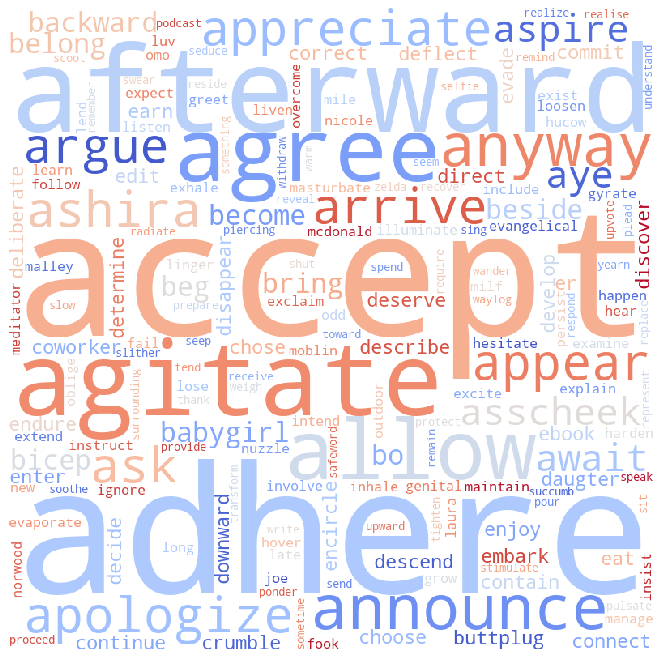

In [56]:
comment_words = ' '

for val in tvec_X_train_df: 
    val = str(val) 
    tokens = val.split()
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    for words in tokens: 
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10, relative_scaling = 1, colormap = 'coolwarm').generate(comment_words) 
  
                      
plt.figure(figsize = (9, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()
# wordcloud.to_file("tvec_word_cloud.png")